# RNN Starter Code


In [2]:
import numpy as np
import pandas
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

## Read in the Charlottesville weather data

In [3]:
df = pandas.read_csv("cho_weather.csv")
data = df.to_numpy()[:, 2:9]
print(data)

[['44.00' '41.00' '88.77' ... '0.00' '1015.20' '0.00']
 ['45.00' '43.00' '92.65' ... '5.75' '1013.60' '0.00']
 ['48.00' '45.00' '89.29' ... '6.90' '1012.30' '0.00']
 ...
 ['85.00' '50.00' '29.85' ... '4.60' '1009.40' 'T']
 ['82.00' '43.00' '25.24' ... '5.75' '1009.60' 'T']
 ['80.00' '44.00' '27.99' ... '3.45' '1009.90' '0.00']]


In [4]:
for j in range(data.shape[1]):
    for i in range(data.shape[0]):
        if data[i, j] == "M":
            data[i, j] = data[i - 1, j]
        elif data[i, j] == "T":
            data[i, j] = 0.0

data = np.float32(data)

N = data.shape[0]
print(data)

[[  44.     41.     88.77 ...    0.   1015.2     0.  ]
 [  45.     43.     92.65 ...    5.75 1013.6     0.  ]
 [  48.     45.     89.29 ...    6.9  1012.3     0.  ]
 ...
 [  85.     50.     29.85 ...    4.6  1009.4     0.  ]
 [  82.     43.     25.24 ...    5.75 1009.6     0.  ]
 [  80.     44.     27.99 ...    3.45 1009.9     0.  ]]


# Question 2

need to add observations

## 2A

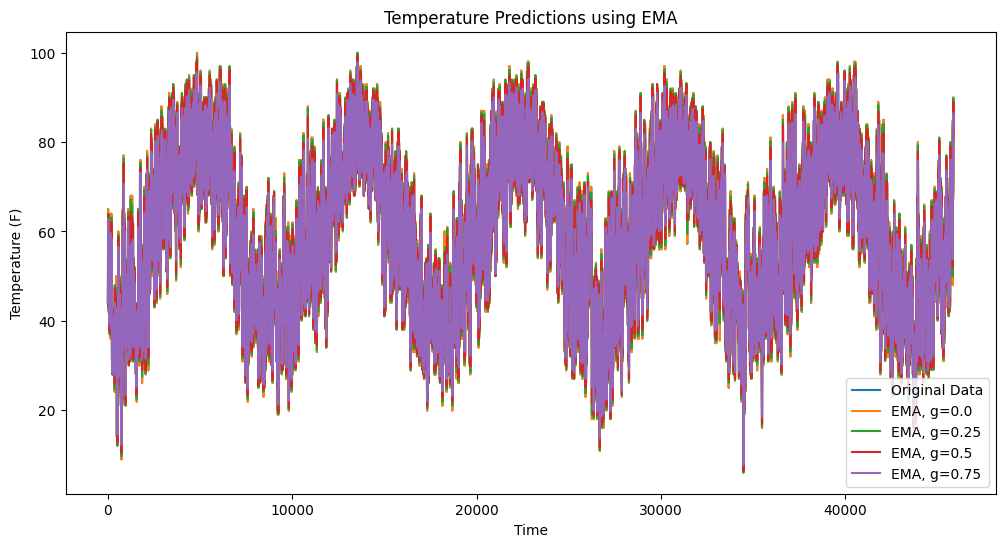

In [5]:
def ema(x, g):
    y = np.zeros_like(x)
    y[0] = x[0]
    for n in range(1, len(x)):
        y[n] = (1 - g) * x[n] + g * y[n-1]
    return y

g_values = [0.0, 0.25, 0.5, 0.75]

plt.figure(figsize=(12, 6))
plt.plot(data[:, 0], label='Original Data')

for g in g_values:
    y_pred = ema(data[:, 0], g)
    plt.plot(np.arange(1, len(y_pred)+1), y_pred, label=f'EMA, g={g}')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.title('Temperature Predictions using EMA')
plt.show()

# For ease, plotting each g against original data

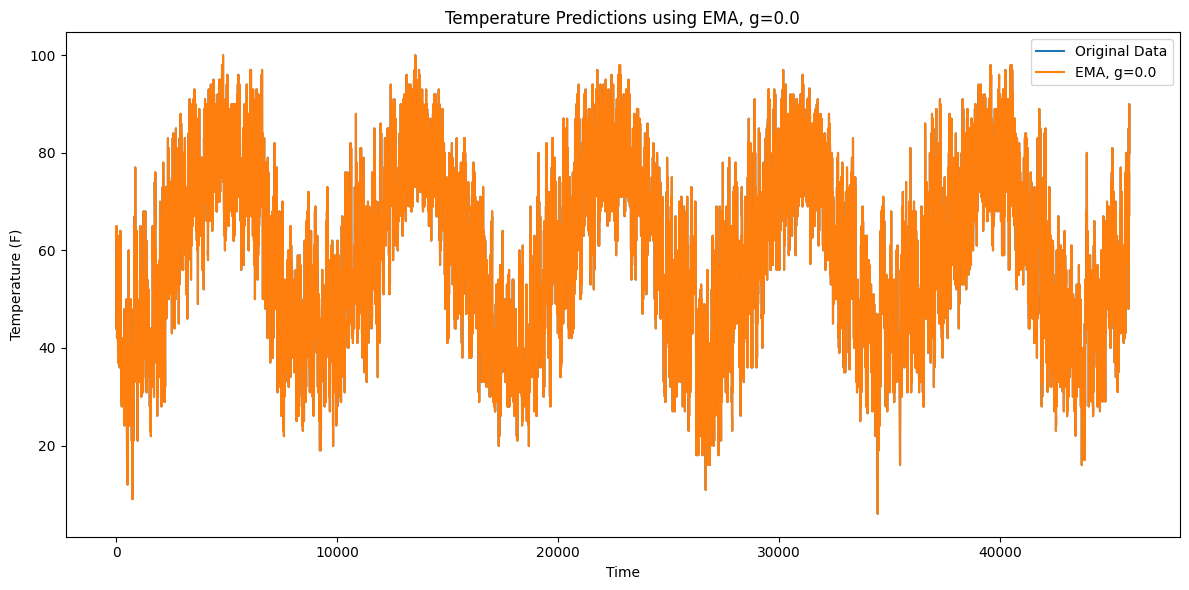

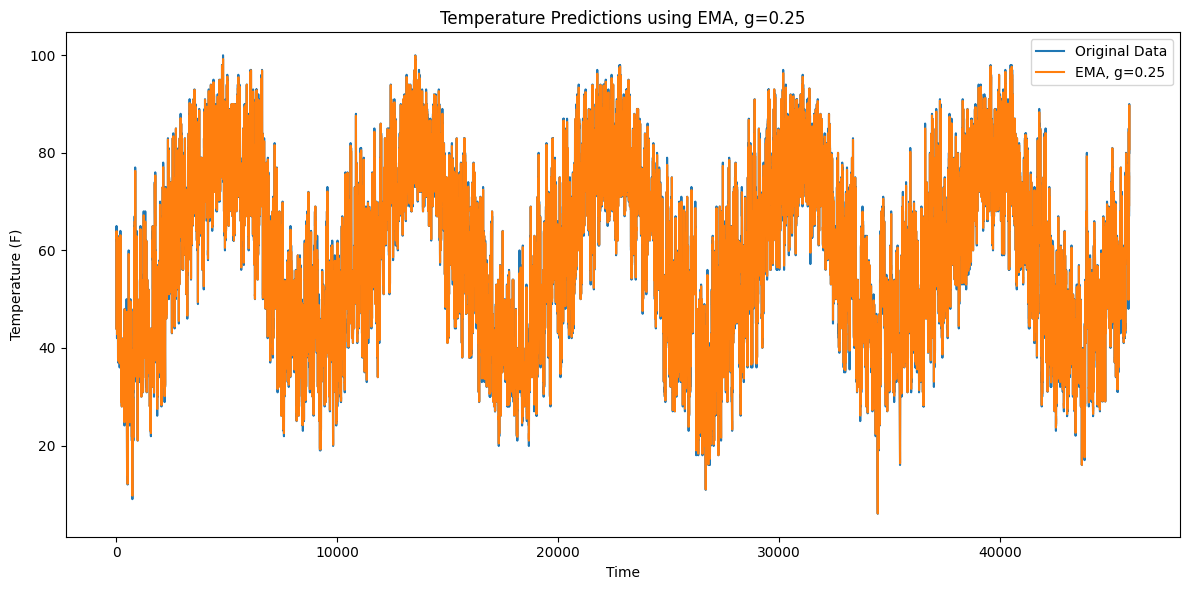

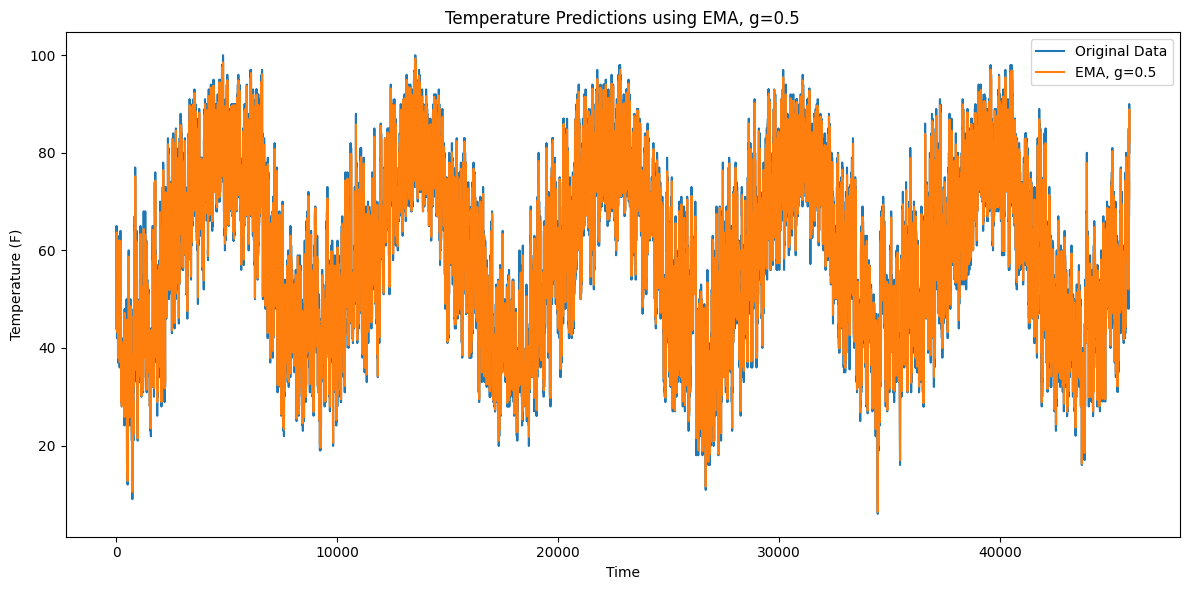

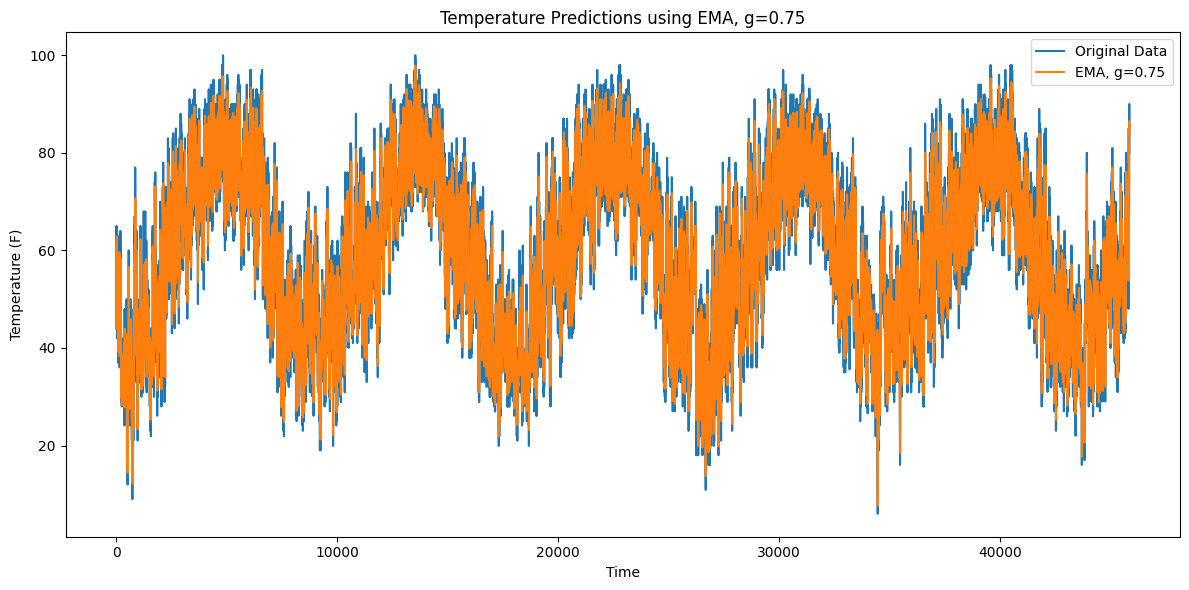

In [6]:
for g in g_values:
    y_pred = ema(data[:, 0], g)
    plt.figure(figsize=(12, 6))
    plt.plot(data[:, 0], label='Original Data')
    plt.plot(np.arange(1, len(y_pred)+1), y_pred, label=f'EMA, g={g}')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Temperature (F)')
    plt.title(f'Temperature Predictions using EMA, g={g}')
    plt.tight_layout()
    plt.show()

## 2b

In [7]:
def compute_mae(x, y):
    return np.sum(np.abs(x - y)) / (len(x) - 1)

g_values = [0.0, 0.25, 0.5, 0.75]
maes = []

for g in g_values:
    y_pred = ema(data[:, 0], g)
    mae = compute_mae(data[:, 0], y_pred)
    maes.append(mae)
    print(f"MAE for g = {g}: {mae:.4f}")

best_g = g_values[np.argmin(maes)]
best_gSTORED_2B = best_g
print(f"The best performing model has g = {best_g}")

MAE for g = 0.0: 0.0000
MAE for g = 0.25: 0.5310
MAE for g = 0.5: 1.4208
MAE for g = 0.75: 3.2613
The best performing model has g = 0.0


## 2c

In [8]:
#def ema_24hr(x, g):
#    y = np.zeros_like(x)
#    y[24:] = (1 - g) * x[:-24] + g * y[:-24]
#    return y

def ema_24hr(x, g):
    y = np.zeros_like(x)
    y[0] = x[0]
    for n in range(24, len(x)):
        y[n] = (1 - g) * x[n-24] + g * y[n-24]
    return y


g_values = [0.0, 0.25, 0.5, 0.75]
maes = []

for g in g_values:
    y_pred = ema_24hr(data[:, 0], g)
    mae = compute_mae(data[24:, 0], y_pred[24:])
    maes.append(mae)
    print(f"MAE for g = {g} with 24-hour delay: {mae:.4f}")

best_g = g_values[np.argmin(maes)]
best_gSTORED_2C = best_g
print(f"The best performing model has g = {best_g}")

MAE for g = 0.0 with 24-hour delay: 6.0911
MAE for g = 0.25 with 24-hour delay: 5.9803
MAE for g = 0.5 with 24-hour delay: 6.0562
MAE for g = 0.75 with 24-hour delay: 6.3106
The best performing model has g = 0.25


## 2d

In [9]:
def ema_8hr(x, g):
    y = np.zeros_like(x)
    y[0] = x[0]
    for n in range(8, len(x)):
        y[n] = (1 - g) * x[n-8] + g * y[n-8]
    return y

# Compute MAE for each EMA model with 8-hour delay
g_values = [0.0, 0.25, 0.5, 0.75]
maes = []

for g in g_values:
    y_pred = ema_8hr(data[:, 0], g)
    mae = compute_mae(data[8:, 0], y_pred[8:])
    maes.append(mae)
    print(f"MAE for g = {g} with 8-hour delay: {mae:.4f}")

best_g = g_values[np.argmin(maes)]
best_gSTORED_2D = best_g
print(f"The best performing model has g = {best_g}")

MAE for g = 0.0 with 8-hour delay: 9.1714
MAE for g = 0.25 with 8-hour delay: 8.2629
MAE for g = 0.5 with 8-hour delay: 7.5584
MAE for g = 0.75 with 8-hour delay: 7.2984
The best performing model has g = 0.75


## Linear prediction model

In [10]:
class LinearPredictor(nn.Module):
    def __init__(self, window_size, y_size = 1):
        super(LinearPredictor, self).__init__()
        self.y_size = y_size
        self.window_size = window_size
        self.linear = nn.Linear(window_size, 1)

    ## Here h is a dummy hidden variable, just to make this call the same as an RNN
    def forward(self, x, h):
        y = self.linear(x.reshape(1, self.window_size))
        return y.reshape(self.y_size), h

## RNN model

In [11]:
class RNN(nn.Module):
    def __init__(self, x_size, h_size, y_size):
        super(RNN, self).__init__()

        self.y_size = y_size

        self.x2h = nn.Linear(x_size, h_size)
        self.h2h = nn.Linear(h_size, h_size)
        self.h2y = nn.Linear(h_size, y_size)

    def forward(self, x, h):
        y = torch.zeros(self.y_size)
        for i in range(x.shape[0]):
            h = F.tanh(self.x2h(x[i]) + self.h2h(h))
            y = self.h2y(h) + x[i, 0]
            ## You might try replacing the line above with the following, which does not do the +x[i,0] (skip connection)
            ## y = self.h2y(h)
        return y.reshape(self.y_size), h

## Training routine, works for LinearPredictor or RNN as the model

In [12]:
def train(targets, x, model, window_size, optimizer, num_epochs, criterion, h_size = 1):
    N = x.shape[0]

    for epoch in range(num_epochs):
        total_loss = 0.0
        for i in range(window_size, N):
            model.zero_grad()

            h = torch.zeros(1, h_size)
            ## this?
            ## y, h = model(x[(i - window_size - offset):(i - offset)], h)
            y, h = model(x[(i - window_size):i], h)

            loss = criterion(y, targets[i])
            loss.backward()

            optimizer.step()

            total_loss += loss.detach()

        # convert to mean loss
        total_loss = total_loss / (N - window_size)

        print(epoch, ": Training Loss = ", total_loss.item())

## Running the training

In [13]:
# Pull out the temperature time series
temps = data[:, 0]

test_data = data[-8760:, 0]
train_data = data[:-8760, 0]

## Evaluating the best MAE models from 2b, 2c, 2d

In [14]:
# Evaluate the best EMA model on the test set
def evaluate_model(model, test_data):
    if isinstance(model, np.ndarray):
        test_predictions = model[-len(test_data):]
    else:
        test_predictions = model(test_data)
    return compute_mae(test_data, test_predictions)

In [15]:
# Load the best EMA model from part 2b

best_g = best_gSTORED_2B  # Assuming you stored the best gain parameter in this variable
best_ema_model = ema(train_data, best_g)

best_ema_mae = evaluate_model(best_ema_model, test_data)
print(f"Best EMA model (g={best_g}) MAE on test set: {best_ema_mae:.4f}")

# Compute EMA models with 8-hour and 24-hour delays
ema_8hr_model = ema_8hr(train_data, best_gSTORED_2D)
ema_24hr_model = ema_24hr(train_data, best_gSTORED_2C)

best_g = best_gSTORED_2D

# Evaluate 8-hour and 24-hour EMA models on the test set
ema_8hr_mae = evaluate_model(ema_8hr_model, test_data[8:])
print(f"EMA 8-hour model (g={best_g}) MAE on test set: {ema_8hr_mae:.4f}")

best_g = best_gSTORED_2C

ema_24hr_mae = evaluate_model(ema_24hr_model, test_data[24:])
print(f"EMA 24-hour model (g={best_g}) MAE on test set: {ema_24hr_mae:.4f}")

Best EMA model (g=0.0) MAE on test set: 11.8321
EMA 8-hour model (g=0.75) MAE on test set: 9.1836
EMA 24-hour model (g=0.25) MAE on test set: 11.0766


## Training the Models

In [16]:
### SET YOUR PARAMETERS HERE! ####
###
learning_rate = 5
num_epochs = 10
window_size = 4
x_size = 3
h_size = 5
y_size = 3
# modified above

# model = RNN(x_size, h_size, y_size)
### OR ###
model = LinearPredictor(window_size)

# Set up your loss function (MAE)
criterion = nn.L1Loss()

# Set up a gradient descent optimizer
# You might also try "SGD" instead of "Adam"
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Define inputs and targets
# You should define "start" and "end" of the training data
# "offset" is how far in the future you want to predict (prediction will be (offset + 1) timepoints in the future)
start = 0
end = 5
offset = 1
#modified start, end, offset
L = end - start
#x = torch.Tensor(temps[start:end]).reshape(L, 1)
#targets = torch.Tensor(temps[(start + offset):(end + offset)]).reshape(L, 1)
x = torch.Tensor(test_data[start:end]).reshape(L, 1)
targets = torch.Tensor(test_data[(start + offset):(end + offset)]).reshape(L, 1)

out_y = train(targets, x, model, window_size, optimizer, num_epochs, criterion, h_size)

0 : Training Loss =  108.37971496582031
1 : Training Loss =  1241.6202392578125
2 : Training Loss =  1170.5675048828125
3 : Training Loss =  627.57861328125
4 : Training Loss =  150.07470703125
5 : Training Loss =  408.16729736328125
6 : Training Loss =  323.060302734375
7 : Training Loss =  4.5012359619140625
8 : Training Loss =  37.5123291015625
9 : Training Loss =  155.24501037597656


## Saving and Loading Trained Models

In [17]:
# Here is how you save a trained model.
torch.save(model.state_dict(), "your_filename_here.pt")

In [18]:
# And here is how you would load such a saved model
# Make sure you can reload the model and that it gives the same test results that you expect!
# You have to call the same model creation code "LinearPredictor" or "RNN" to create the model first
model = LinearPredictor(window_size)
model.load_state_dict("your_filename_here.pt")

TypeError: Expected state_dict to be dict-like, got <class 'str'>.